In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

import os
import sys

import matplotlib.lines as mlines
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats

In [2]:
HEADERS = [
    "device",
    "layout",
    "enc_type",
    "n_states",
    "sim_type",
    "shots",
    "optimizer",
    "energy",
    "meas_mit",
]

df = pd.DataFrame(columns=HEADERS)

diagonalized_values = [
    (0, 0),
    (1, -0.43658111),
    (2, -1.749160),
    (3, -2.045671),
    (4, -2.1439810),
    (5, -2.183592),
    (6, -2.201568),
    (7, -2.210416),
    (8, -2.215038),
    (16, -2.221059),
]

## VQE Energy Distributions with Noise

In [3]:
### Get data

In [4]:
file_loc = "../paper-data/noise/"
for filename in os.listdir(file_loc):
    if "bkp" in filename:
        continue
    if "CNOT" in filename:
        continue
    if "energies.npy" not in filename:
        continue

    if "4_states" in filename:
        n_states = 4
    elif "8_states" in filename:
        n_states = 8

    if "vigo" in filename:
        device_name = "vigo"
    elif "yorktown" in filename:
        device_name = "yorktown"
    elif "no_device" in filename:
        device_name = "no_device"
    else:
        continue
    print(filename)

    enc_type = "Gray code" if "gray_code" in filename else "one-hot"
    optimizer = "SPSA" if "SPSA" in filename else "Nelder-Mead"
    sim_type = "QASM" if "qasm" in filename else statevector
    meas_mit = "True" if "mit_meas" in filename else "False"
    if device_name == "no_device":
        meas_mit = "None"

    if "layout-2-1-3-4" in filename:
        layout = "{2,1,3,4}"
        circ = "None"
    elif "layout-0-1-2-3" in filename:
        layout = "{0,1,2,3}"
        circ = "None"
    elif "layout-2-1" in filename:
        layout = "{2,1}"
        circ = "None"
    elif "layout_None" in filename:
        layout = "None"
        circ = "None"
    else:
        if device_name == "no_device":
            layout = "None"
            circ = "None"
        else:
            if "layout-4-2-3" in filename:
                layout = "{4,2,3}"
                circ = "True"
            elif "layout-4-2-1" in filename:
                layout = "{4,2,1}"
                circ = "False"
            elif "layout_None" in filename:
                layout = "None"
                circ = "None"
            elif "layout-0-1-2" in filename:
                layout = "{0,1,2}"
                circ = "False"
            else:
                continue
                # raise ValueError
                # layout = 'None'
                # circ = 'None'

    n_shots = 10000

    base_dict = {
        "device": device_name,
        "layout": layout,
        "enc_type": enc_type,
        "n_states": n_states,
        "sim_type": sim_type,
        "shots": n_shots,
        "optimizer": optimizer,
        "meas_mit": meas_mit,
        "circ": circ,
    }

    print(base_dict)

    data = np.load(f"{file_loc}{filename}")

    for energy in data:
        next_dict = base_dict
        next_dict["energy"] = energy
        df = df.append(next_dict, ignore_index=True)

print(
    df.groupby(
        [
            "device",
            "layout",
            "enc_type",
            "sim_type",
            "n_states",
            "shots",
            "optimizer",
            "meas_mit",
            "circ",
        ]
    ).describe()
)

2020-07-17_gray_code-4_states-qasm_simulator-10000_shots-SPSA-no_device-energies.npy
{'device': 'no_device', 'layout': 'None', 'enc_type': 'Gray code', 'n_states': 4, 'sim_type': 'QASM', 'shots': 10000, 'optimizer': 'SPSA', 'meas_mit': 'None', 'circ': 'None'}
2020-07-19_one_hot-4_states-qasm_simulator-10000_shots-SPSA-ibmq_5_yorktown_layout-0-1-2-3-energies.npy
{'device': 'yorktown', 'layout': '{0,1,2,3}', 'enc_type': 'one-hot', 'n_states': 4, 'sim_type': 'QASM', 'shots': 10000, 'optimizer': 'SPSA', 'meas_mit': 'False', 'circ': 'None'}
2020-07-17_gray_code-8_states-qasm_simulator-10000_shots-SPSA-no_device-energies.npy
{'device': 'no_device', 'layout': 'None', 'enc_type': 'Gray code', 'n_states': 8, 'sim_type': 'QASM', 'shots': 10000, 'optimizer': 'SPSA', 'meas_mit': 'None', 'circ': 'None'}
2020-07-17_one_hot-4_states-qasm_simulator-10000_shots-SPSA-ibmq_vigo_layout-2-1-3-4-energies.npy
{'device': 'vigo', 'layout': '{2,1,3,4}', 'enc_type': 'one-hot', 'n_states': 4, 'sim_type': 'QASM', 

### N=4 Vigo

Gray code
('False', '{2,1}', 'vigo')
           energy
count  100.000000
mean    -1.867915
std      0.079966
min     -2.069642
25%     -1.920380
50%     -1.860678
75%     -1.816139
max     -1.643021
('None', 'None', 'no_device')
           energy
count  100.000000
mean    -2.128431
std      0.060980
min     -2.279766
25%     -2.165392
50%     -2.129411
75%     -2.092758
max     -1.964699
('True', '{2,1}', 'vigo')
           energy
count  100.000000
mean    -1.977657
std      0.083980
min     -2.160156
25%     -2.041282
50%     -1.983721
75%     -1.916738
max     -1.750779


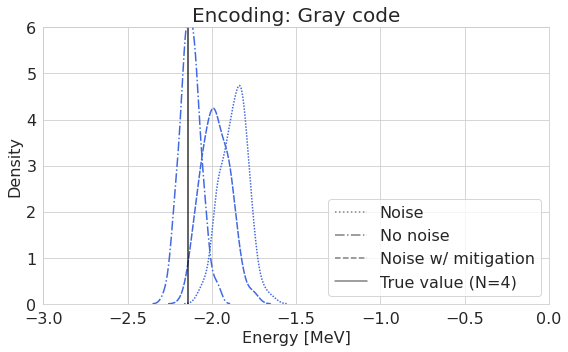

one-hot
('False', '{2,1,3,4}', 'vigo')
           energy
count  100.000000
mean    -0.591440
std      0.120598
min     -0.896319
25%     -0.678063
50%     -0.578703
75%     -0.522756
max     -0.198115
('None', 'None', 'no_device')
           energy
count  100.000000
mean    -2.132909
std      0.134548
min     -2.500482
25%     -2.221721
50%     -2.126257
75%     -2.031609
max     -1.746591
('True', '{2,1,3,4}', 'vigo')
           energy
count  100.000000
mean    -1.194863
std      0.150807
min     -1.518301
25%     -1.304510
50%     -1.205979
75%     -1.108096
max     -0.814928


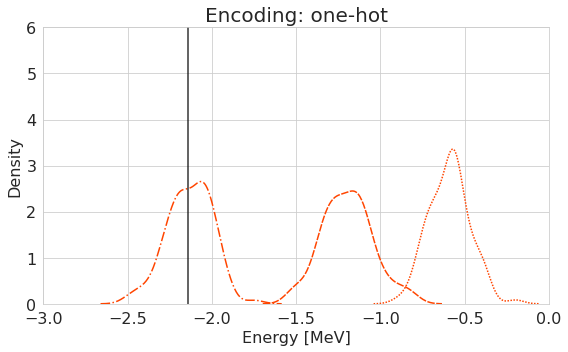

In [5]:
# colours = {"Gray code": "tab:blue", "one-hot": "tab:orange", "None": "tab:gray"}
colours = {"Gray code": "royalblue", "one-hot": "orangered", "None": "tab:gray"}

linestyles = {"True": (0, (5, 1)), "False": (0, (1, 1)), "None": "-."}

# for key, grp in df.query("n_states==4 and (device=='vigo' or device=='no_device'").groupby("enc_type"):
for key, grp in df[
    (df["n_states"] == 4) & ((df["device"] == "vigo") | (df["device"] == "no_device"))
].groupby("enc_type"):
    fig, ax = plt.subplots(figsize=(8, 5))

    print(key)
    for mit_key, mit_grp in grp.groupby(["meas_mit", "layout", "device"]):
        print(mit_key)
        print(mit_grp.describe())
        if mit_key[0] == "False":
            label = "Noise"
        elif mit_key[0] == "True":
            label = "Noise w/ mitigation"
        elif mit_key[0] == "None":
            label = "No noise"
        else:
            raise ValueError
        # plt.hist(mit_grp['energy'])
        sns.kdeplot(
            mit_grp["energy"],
            bw_method="scott",
            label=label,
            color=colours[key],
            linestyle=linestyles[mit_key[0]],
            ax=ax,
        )

    ax.axvline(
        x=diagonalized_values[4][1],
        color="black",
        label="True value (N = 4)",
        alpha=0.8,
    )

    if key == "Gray code":
        m1 = mlines.Line2D([], [], color="grey", ls=":")
        m2 = mlines.Line2D([], [], color="grey", ls="--")
        m3 = mlines.Line2D([], [], color="grey", ls="-.")
        m4 = mlines.Line2D([], [], color="grey", ls="-")
        ax.legend(
            (m1, m3, m2, m4),
            ("Noise", "No noise", "Noise w/ mitigation", "True value (N=4)"),
            fontsize=16,
            loc="lower right",
        )
        # ax.legend(fontsize=14, loc='lower right')
    # else:
    #    ax.legend_.remove()

    ax.set_ylabel("Density", fontsize=16)
    ax.set_xlabel("Energy [MeV]", fontsize=16)
    ax.set_xlim(-3, 0)
    plt.ylim(0, 6)
    # ax.set_xticks(fontsize=16)
    # ax.set_yticks(fontsize=16)
    ax.tick_params(labelsize=16)

    title_string = f"Encoding: {key}"

    ax.set_title(title_string, fontsize=20)

    fig.tight_layout()

    plt.savefig(f"../paper-figures/4_state (Vigo): {key}.pdf")
    plt.show()

### N=4 Vigo vs Yorktown

Gray code
('False', '{2,1}', 'vigo')
           energy
count  100.000000
mean    -1.867915
std      0.079966
min     -2.069642
25%     -1.920380
50%     -1.860678
75%     -1.816139
max     -1.643021
('False', '{2,1}', 'yorktown')
           energy
count  100.000000
mean    -1.003189
std      0.094329
min     -1.270417
25%     -1.075266
50%     -0.996976
75%     -0.934537
max     -0.770462
('None', 'None', 'no_device')
           energy
count  100.000000
mean    -2.128431
std      0.060980
min     -2.279766
25%     -2.165392
50%     -2.129411
75%     -2.092758
max     -1.964699
('True', '{2,1}', 'vigo')
           energy
count  100.000000
mean    -1.977657
std      0.083980
min     -2.160156
25%     -2.041282
50%     -1.983721
75%     -1.916738
max     -1.750779
('True', '{2,1}', 'yorktown')
           energy
count  100.000000
mean    -1.807259
std      0.121140
min     -2.114951
25%     -1.890021
50%     -1.801588
75%     -1.726853
max     -1.520545


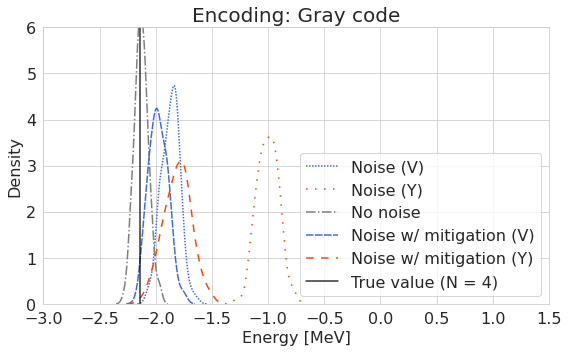

one-hot
('False', '{0,1,2,3}', 'yorktown')
           energy
count  100.000000
mean     1.004264
std      0.130002
min      0.708371
25%      0.918273
50%      1.008912
75%      1.106322
max      1.294719
('False', '{2,1,3,4}', 'vigo')
           energy
count  100.000000
mean    -0.591440
std      0.120598
min     -0.896319
25%     -0.678063
50%     -0.578703
75%     -0.522756
max     -0.198115
('None', 'None', 'no_device')
           energy
count  100.000000
mean    -2.132909
std      0.134548
min     -2.500482
25%     -2.221721
50%     -2.126257
75%     -2.031609
max     -1.746591
('True', '{0,1,2,3}', 'yorktown')
           energy
count  100.000000
mean    -0.555317
std      0.164318
min     -0.961507
25%     -0.667324
50%     -0.559314
75%     -0.440088
max     -0.130215
('True', '{2,1,3,4}', 'vigo')
           energy
count  100.000000
mean    -1.194863
std      0.150807
min     -1.518301
25%     -1.304510
50%     -1.205979
75%     -1.108096
max     -0.814928


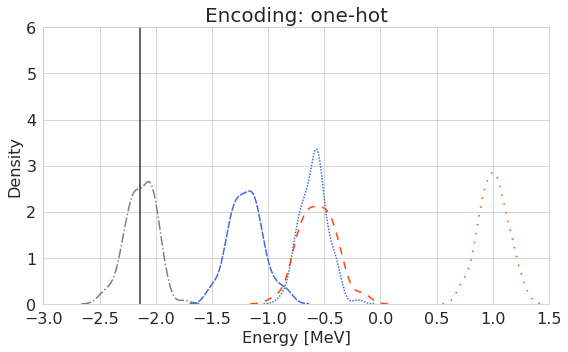

In [6]:
# colours = {'Gray code' : "tab:blue", 'Jordan-Wigner' : "tab:orange", 'None' : "tab:gray"}
# colours = {"vigo": "tab:blue", "yorktown": "tab:orange", "no_device": "tab:gray"}
colours = {"vigo": "royalblue", "yorktown": "orangered", "no_device": "tab:gray"}

linestyles = {
    ("True", "vigo"): (0, (5, 1)),
    ("False", "vigo"): (0, (1, 1)),
    ("None", "no_device"): "-.",
    ("True", "yorktown"): (0, (5, 5)),
    ("False", "yorktown"): (0, (1, 5)),
}

for key, grp in df[df["n_states"] == 4].groupby("enc_type"):
    fig, ax = plt.subplots(figsize=(8, 5))

    print(key)
    for mit_key, mit_grp in grp.groupby(["meas_mit", "layout", "device"]):
        print(mit_key)
        print(mit_grp.describe())
        if mit_key[0] == "False":
            label = "Noise"
        elif mit_key[0] == "True":
            label = "Noise w/ mitigation"
        elif mit_key[0] == "None":
            label = "No noise"
        else:
            raise ValueError
        if mit_key[2] == "vigo":
            label = label + " (V)"
        elif mit_key[2] == "yorktown":
            label = label + " (Y)"
        # plt.hist(mit_grp['energy'])
        sns.kdeplot(
            mit_grp["energy"],
            bw_method="scott",
            label=label,
            color=colours[mit_key[2]],
            linestyle=linestyles[(mit_key[0], mit_key[2])],
            ax=ax,
        )

    ax.axvline(
        x=diagonalized_values[4][1],
        color="black",
        label="True value (N = 4)",
        alpha=0.8,
    )

    if key == "Gray code":
        ax.legend(fontsize=16, loc="lower right")
    # else:
    #    ax.legend_.remove()

    ax.set_ylabel("Density", fontsize=16)
    ax.set_xlabel("Energy [MeV]", fontsize=16)
    ax.set_xlim(-3, 1.5)
    plt.ylim(0, 6)
    # ax.set_xticks(fontsize=16)
    # ax.set_yticks(fontsize=16)
    ax.tick_params(labelsize=16)

    title_string = f"Encoding: {key}"

    ax.set_title(title_string, fontsize=20)

    fig.tight_layout()

    plt.savefig(f"../paper-figures/4_state: {key}.pdf")
    plt.show()

### N=8 Vigo vs Yorktown

/home/peter/.miniconda3/envs/deuteron/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/peter/.miniconda3/envs/deuteron/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/peter/.miniconda3/envs/deuteron/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/peter/.miniconda3/envs/deuteron/li

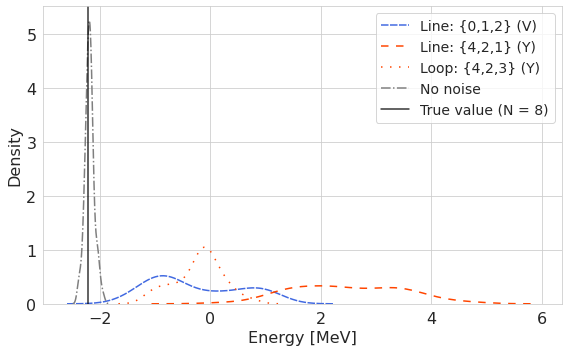

In [7]:
# colours = {"True" : "tab:blue", "False" : "tab:orange", "None" : "tab:gray"}
# colours = {"vigo": "tab:blue", "yorktown": "tab:orange", "no_device": "tab:gray"}
colours = {"vigo": "royalblue", "yorktown": "orangered", "no_device": "tab:gray"}

linestyles = {
    ("True", "vigo"): (0, (1, 1)),
    ("False", "vigo"): (0, (5, 1)),
    ("None", "no_device"): "-.",
    ("True", "yorktown"): (0, (1, 5)),
    ("False", "yorktown"): (0, (5, 5)),
}

fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df[df["n_states"] == 8].groupby(
    ["circ", "meas_mit", "enc_type", "layout", "device"]
):
    if key[2] == "Jordan-Wigner":
        continue
    if key[1] == "False":
        continue
    if key[0] == "True":
        label = f"Loop: {key[3]}"
    elif key[0] == "False":
        label = f"Line: {key[3]}"
    else:
        label = "No noise"
    if key[4] == "vigo":
        label = label + " (V)"
    elif key[4] == "yorktown":
        label = label + " (Y)"
    sns.kdeplot(
        grp["energy"],
        bw="scott",
        label=f"{label}",
        color=colours[key[4]],
        linestyle=linestyles[(key[0], key[4])],
        ax=ax,
    )

ax.axvline(
    x=diagonalized_values[8][1], color="black", label="True value (N = 8)", alpha=0.8
)

handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 3, 2, 4]
handles, labels = [handles[i] for i in order], [labels[i] for i in order]
ax.legend(handles, labels, fontsize=14)

ax.set_ylabel("Density", fontsize=16)
ax.set_xlabel("Energy [MeV]", fontsize=16)
# ax.set_xlim(-3,10)
# plt.ylim(0,20)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.tick_params(labelsize=16)

# title_string = f"Yorktown, meas_mit={key[1]}"

# plt.title(title_string, fontsize=20)

fig.tight_layout()

plt.savefig(f"../paper-figures/8_states_yorktown.pdf")
plt.show()

## Zero-Noise Extrapolation

In [8]:
device = "ibmq_vigo"
encodings = ["one_hot", "gray_code"]
layout = {"gray_code": "2-1", "one_hot": "2-1-3-4"}
nCNOTs = np.array([0, 1, 2, 3])
colours = {"gray_code": "royalblue", "one_hot": "orangered"}
markers = {"gray_code": "o", "one_hot": "s"}
fillcolour = {"gray_code": "cornflowerblue", "one_hot": "coral"}

df = pd.DataFrame(
    columns=[
        "encoding",
        "CNOTs",
        "mean",
        "std",
    ]
)
for encoding in encodings:
    for n in nCNOTs:
        filename = f"{file_loc}2020-07-29_{encoding}-4_states-qasm_simulator-10000_shots-SPSA-{device}_layout-{layout[encoding]}-mit_meas-CNOTs{n}-energies.npy"
        data = np.load(filename)
        mu = np.mean(data)
        err = np.std(data)
        datadict = {"encoding": encoding, "CNOTs": n, "mean": mu, "std": err}
        print(datadict)
        df = df.append(datadict, ignore_index=True)

print(df)

{'encoding': 'one_hot', 'CNOTs': 0, 'mean': -1.1835283805568277, 'std': 0.14043355395163837}
{'encoding': 'one_hot', 'CNOTs': 1, 'mean': 0.38388419690571896, 'std': 0.15466162774091174}
{'encoding': 'one_hot', 'CNOTs': 2, 'mean': 1.7711523120646018, 'std': 0.1316837499646994}
{'encoding': 'one_hot', 'CNOTs': 3, 'mean': 3.0971498140557774, 'std': 0.161981487730553}
{'encoding': 'gray_code', 'CNOTs': 0, 'mean': -1.9853605625734243, 'std': 0.07580052105250316}
{'encoding': 'gray_code', 'CNOTs': 1, 'mean': -1.772621576279846, 'std': 0.06915911082232482}
{'encoding': 'gray_code', 'CNOTs': 2, 'mean': -1.593149769046779, 'std': 0.08923858386010346}
{'encoding': 'gray_code', 'CNOTs': 3, 'mean': -1.4119967001768345, 'std': 0.07680054192502961}
    encoding CNOTs      mean       std
0    one_hot     0 -1.183528  0.140434
1    one_hot     1  0.383884  0.154662
2    one_hot     2  1.771152  0.131684
3    one_hot     3  3.097150  0.161981
4  gray_code     0 -1.985361  0.075801
5  gray_code     1 -1

6.0
4   -1.985361
5   -1.772622
6   -1.593150
7   -1.411997
Name: mean, dtype: float64
0   -1.183528
1    0.383884
2    1.771152
3    3.097150
Name: mean, dtype: float64


/home/peter/.miniconda3/envs/deuteron/lib/python3.7/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


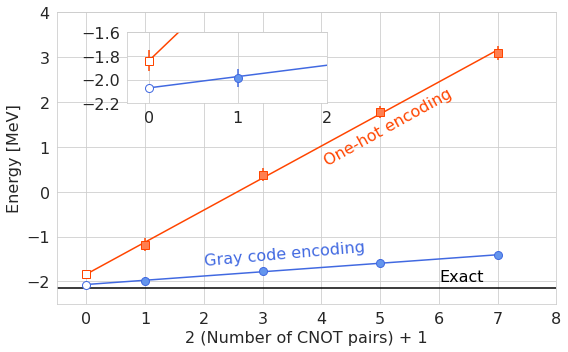

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
ins = inset_axes(
    ax,
    width="50%",
    height="35%",
    bbox_to_anchor=(-0.25, 0.25, 0.8, 0.7),
    bbox_transform=ax.transAxes,
)

import matplotlib as mpl

print(mpl.rcParams["lines.markersize"])
# mpl.rcParams['font.size'] = 16

ax.axhline(y=diagonalized_values[4][1], ls="-", c="k")
ms = 8
oppfill = {}
oppfill["gray_code"] = "white"
oppfill["one_hot"] = "orangered"

for enckey, encgrp in df.groupby("encoding"):
    # do fit
    x = 2 * nCNOTs + 1
    y = encgrp["mean"]
    print(y)
    y_e = encgrp["std"]
    coef, cov = np.polyfit(x, y, 1, cov=True, w=1 / y_e)
    ax.errorbar(
        x,
        y,
        y_e,
        color=colours[enckey],
        marker=markers[enckey],
        ms=ms,
        ls="",
        mfc=fillcolour[enckey],
    )
    # ax.errorbar( [0,], [coef[-1],], yerr=[np.sqrt(cov[-1,-1]),], marker=markers[enckey], ms=ms, color=colours[enckey], mfc=oppfill[enckey])
    ax.errorbar(
        [
            0,
        ],
        [
            coef[-1],
        ],
        yerr=[
            np.sqrt(cov[-1, -1]),
        ],
        marker=markers[enckey],
        ms=ms,
        color=colours[enckey],
        mfc="white",
    )
    poly1d_fn = np.poly1d(coef)
    ax.plot([0, max(x)], poly1d_fn([0, max(x)]), color=colours[enckey], ms=ms, ls="-")

    # repeat for inset
    ins.errorbar(
        x,
        y,
        y_e,
        color=colours[enckey],
        marker=markers[enckey],
        ms=ms,
        ls="",
        mfc=fillcolour[enckey],
    )
    # ins.errorbar( [0,], [coef[-1],], yerr=[np.sqrt(cov[-1,-1]),], marker=markers[enckey], ms=ms, color=colours[enckey], mfc=oppfill[enckey])
    ins.errorbar(
        [
            0,
        ],
        [
            coef[-1],
        ],
        yerr=[
            np.sqrt(cov[-1, -1]),
        ],
        marker=markers[enckey],
        ms=ms,
        color=colours[enckey],
        mfc="white",
    )
    ins.plot([0, max(x)], poly1d_fn([0, max(x)]), color=colours[enckey], ms=ms, ls="-")


ax.annotate(
    r"One-hot encoding",
    color=colours["one_hot"],
    xy=(4, 0.6),
    rotation="29",
    fontsize=16,
)
ax.annotate("Exact", xy=(6, -2), c="k", fontsize=16)
ax.annotate(
    r"Gray code encoding",
    color=colours["gray_code"],
    xy=(2, -1.65),
    rotation="5",
    fontsize=16,
)
ax.set_ylabel("Energy [MeV]", fontsize=16)
ax.set_xlabel("2 (Number of CNOT pairs) + 1", fontsize=16)
ax.set_xticks(range(-1, 10))
ins.set_xticks(range(-1, 10))
ax.set_yticks(np.arange(-3, 5, 1))
ins.set_yticks(np.arange(-3, 2, 0.2))
ax.set_yticks(np.arange(-3, 2, 0.25), minor=True)
ins.set_yticks(np.arange(-3, 2, 0.05), minor=True)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ins.tick_params(axis="x", labelsize=16)
ins.tick_params(axis="y", labelsize=16)
ax.set_xlim(-0.5, 8)
ax.set_ylim(-2.5, 4)
ins.set_xlim(-0.25, 2)
ins.set_ylim(-2.2, -1.6)
plt.tight_layout()
plt.savefig(f"../paper-figures/zero-noise-extrapolation.pdf")